# Visualizing the diabetes dataset

In this notebook, we'll look at different ways to get insight on the data with a zest of visual exploratory analysis.

Let's start by plotting each feature individually.

In [1]:
%matplotlib inline

In [4]:
for index, col in enumerate(df_diabetes.columns.values):
    print index, col

0 Age
1 Sex
2 BMI
3 BP
4 S1
5 S2
6 S3
7 S4
8 S5
9 S6
10 Target


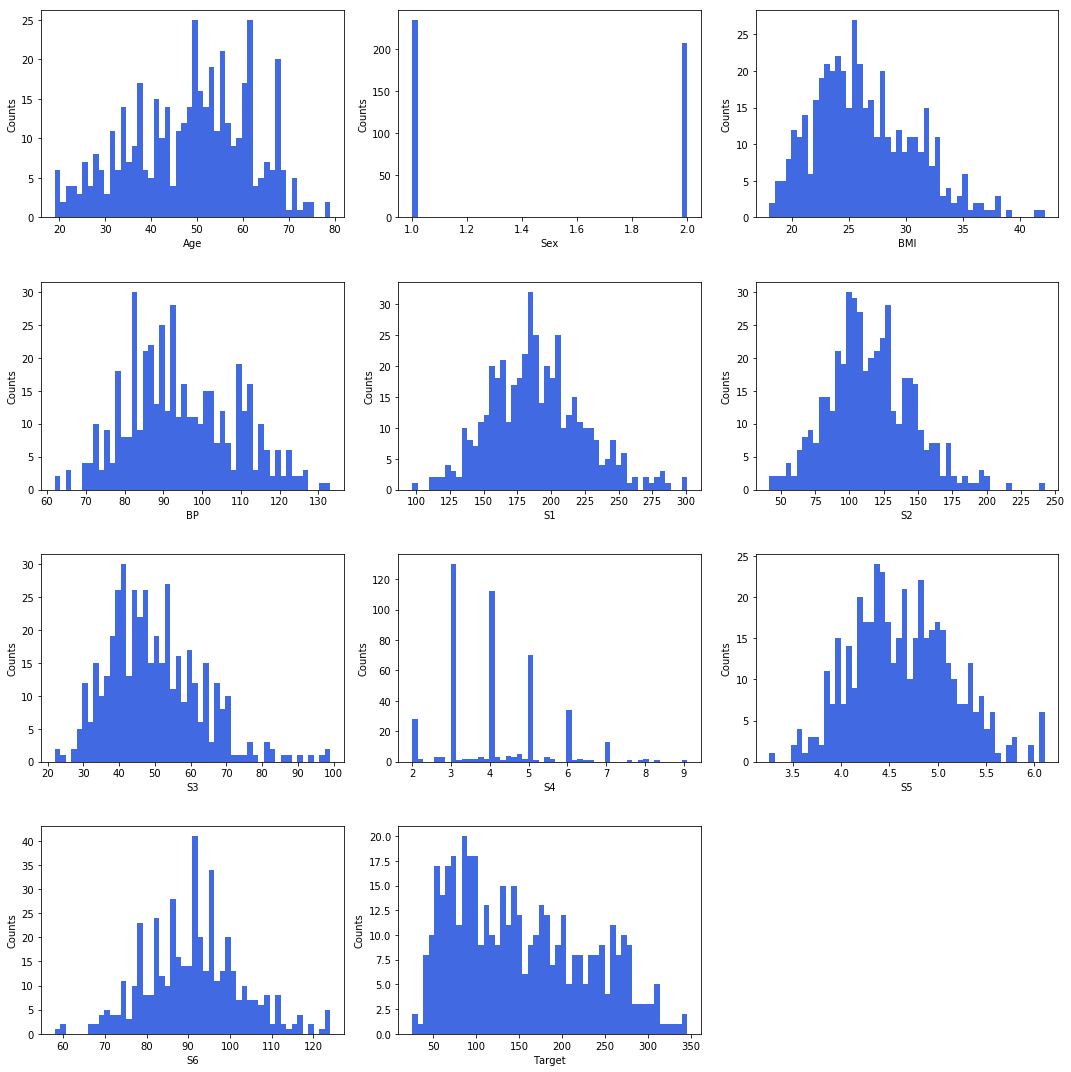

In [5]:
# First import relevant packages and load the data
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pylab as plt
from matplotlib.gridspec import GridSpec

# Load the data and create a pandas dataframe
df_diabetes = pd.read_csv("D:\DSIoT\Git\python\DiabetesVisualisation\diabetes.txt")

# We'll do a grid plot
fig = plt.figure(figsize=(15, 15))
gs = GridSpec(4, 3, bottom=0.18, left=0.18, right=0.88)

for index, col in enumerate(df_diabetes.columns.values) :
    ax = fig.add_subplot(gs[index])
    # histtype : visual look of histogram
    # bins = number of bins in the histogram
    # color = we chose one more eye-pleasing
    ax.hist(df_diabetes[col].values, histtype='stepfilled', bins = 50, color = "royalblue")
    # Label the axes
    ax.set_xlabel(col)
    # Counts : the y-axis will always be the number of entries in the dataset
    ax.set_ylabel("Counts")

# Plot aesthetics
gs.tight_layout(fig, h_pad=3)
plt.show() #uncomment this line to make the plot.

# The figure is uploaded below

![fig1](hist.png)

### What do we see ?

- We quickly spot categorical variables (the Sex and S4)
- We can see the range of each feature and the shape of each distribution
- This tells us about the presence or not of outliers, which can greatly hurt inference in some cases (think of estimating the mean of [1, 1.1, 1.05, 0.95, 1.2, 250] => the mean of the dataset will not be close to 1 because of the outlier value 250).

While this plot is informative, **it does not show correlations between features or with the target.**  

### What do we do from now

To improve that, we're going to load a library called seaborn which expands matplotlib's functionalities.
To install it you can do :

    pip install seaborn
    
And you should be ready to go !

### Plotting the heatmap

We'll start by plotting a so-called heatmap.  
The heatmap shows the correlation coefficient between all features in a single plot.  
See [Wikipedia](https://en.wikipedia.org/wiki/Correlation_and_dependence) for the details of the computation of this correlation coefficient.

This will give us a general idea of what influences what in the data


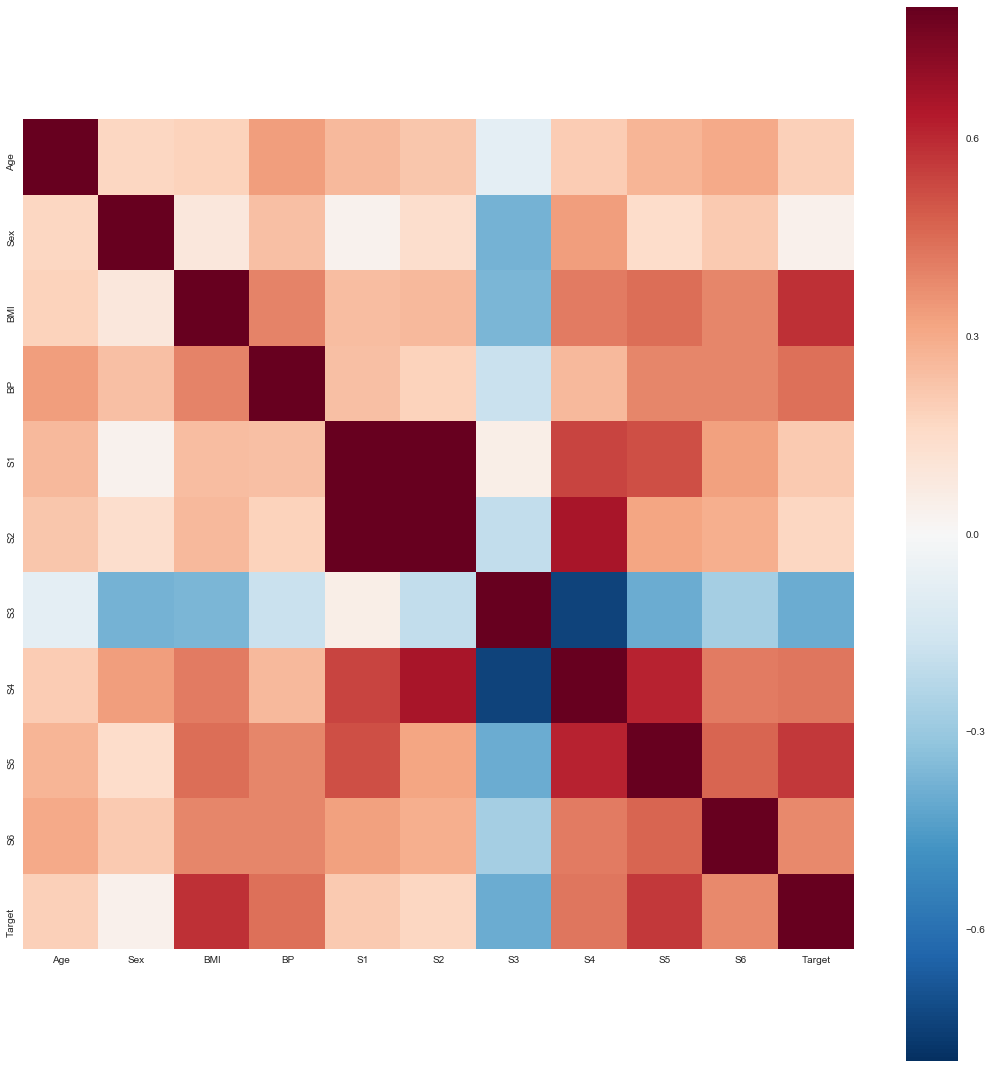

In [6]:
# Import seaborn
import seaborn as sns

# First we compute the sample correlation matrix of the data
corrmat = df_diabetes.corr()

# Then we setup the matplotlib figure
f, ax = plt.subplots(figsize=(15,15))

# The we draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True)

# Set up better plot aesthetics
f.tight_layout()

# And we are done !
#plt.show() uncomment to plot yourself

### What do we see ?

![heat](heatmap.png)


**N.B. Deep red means very positively correlated, deep blue means very positively anti-correlated and white means uncorrelated.**

- S1 and S2 are extremely correlated so one of this feature can be dumped (it does not add much information)
- Similarly S4 and S3 are extremely anti-correlated.
- With just a simple plot, we see that we could reduce the dimension of the feature space by two without losing much information !
- Moving to the correlation with the target (i.e. a measure of the progression of the disease) we see the BMI and S6 are, on their own, good predictors because they are well correlated to the target. So we could have a very simple linear model like target = a*BMI + b*S6 from which we expect good performance.
- This can greatly simplify inference or explanation of the model to a non-specialist public !

### What elso can we do ?

The heatmap is, as we've seen, very instructive.   
But it may oversimplify the information : it tells us nothing about non-linearities in the correlation for instance.  
That's why it is often useful to plot all features against each other.
Let's go !

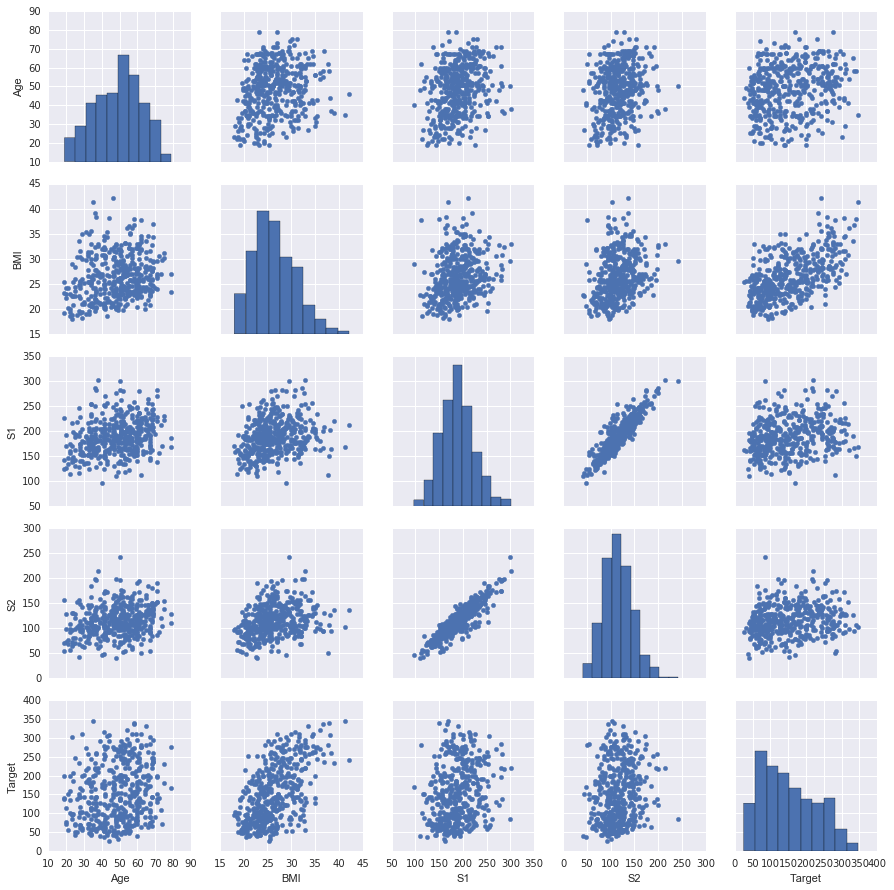

In [7]:
# We'll use a subset of all features to make this more legible
# else the plot is too crowded

# We plot the data on what is called a "data aware" grid :
g = sns.PairGrid(df_diabetes[["Age", "BMI", "S1", "S2", "Target"]])

# Then we can specify what we want and where
# We want the 1D histograms of the features on the diagonal
g.map_diag(plt.hist)
# And we want the scatter plot (feature A vs feature B) on the off-diagonal
g.map_offdiag(plt.scatter)


plt.show() #uncomment to plot yourself

### What do we see ?

![corr](corr2D.png)

- This confirms what we found on the heatmap : S1 and S2 are very correlated, BMI is well correlated to the target while Age, S1 and S2 are only mildly correlated
- There are no marked non-linearities so the performance of a multilinear model should be satisfying
- It is also a good way to look at outliers
